In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
df = yf.download('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509538,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427812,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506985,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409933,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338421,76935930


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-05,2136.449951,2153.550049,2131.500000,2150.199951,2150.199951,5400604
2021-07-06,2144.949951,2148.899902,2120.199951,2124.800049,2124.800049,4647361
2021-07-07,2127.750000,2127.750000,2098.000000,2110.050049,2110.050049,4824931
2021-07-08,2116.949951,2116.949951,2081.000000,2092.600098,2092.600098,5162088
2021-07-09,2088.000000,2091.699951,2066.100098,2071.199951,2071.199951,4165112


In [ ]:
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
df.shape

(6416, 6)

## Historical Stock Data Visualization

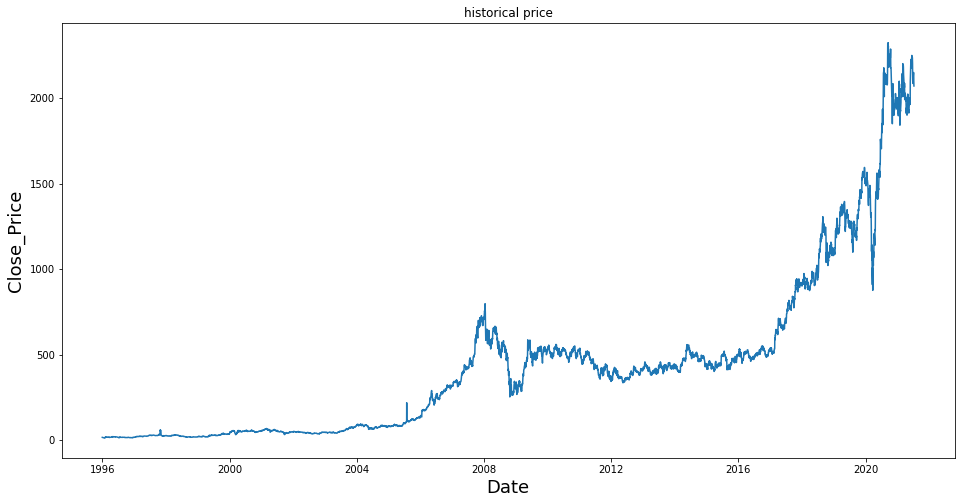

In [ ]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])

In [ ]:
df = np.array(data).reshape(-1,1)
df

array([[  15.91745186],
       [  15.79367065],
       [  15.91358376],
       ...,
       [2110.05004883],
       [2092.60009766],
       [2071.19995117]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
scaled_df

array([[0.00174118],
       [0.00168765],
       [0.0017395 ],
       ...,
       [0.90724963],
       [0.89970423],
       [0.89045075]])

## Training and Testing

In [ ]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5133

In [ ]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00174118, 0.00168765, 0.0017395 , 0.00167594, 0.00162911,
       0.00135815, 0.00117082, 0.00100858, 0.00120093, 0.00113402,
       0.00106879, 0.0010805 , 0.00083295, 0.00066737, 0.00056534,
       0.00066235, 0.00041648, 0.0002258 , 0.        , 0.        ,
       0.00040477, 0.0009032 , 0.00077107, 0.00100858, 0.00167594,
       0.00224296, 0.00162409, 0.00174954, 0.00235168, 0.00278655,
       0.00228979, 0.00273637, 0.00274139, 0.00261595, 0.00247879,
       0.00255573, 0.00214929, 0.00214929, 0.00253399, 0.00245203,
       0.00246876, 0.00238178, 0.00241858, 0.00194523, 0.00198538,
       0.00191178, 0.00191178, 0.00216267, 0.0022279 , 0.00218943,
       0.00221285, 0.00259086, 0.00245872, 0.00245705, 0.00220783,
       0.00187331, 0.00144178, 0.00144178, 0.00191345, 0.00162744])]
[0.0015872970937636458]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5073, 60, 1)

In [ ]:
x_train

array([[[0.00174118],
        [0.00168765],
        [0.0017395 ],
        ...,
        [0.00144178],
        [0.00191345],
        [0.00162744]],

       [[0.00168765],
        [0.0017395 ],
        [0.00167594],
        ...,
        [0.00191345],
        [0.00162744],
        [0.0015873 ]],

       [[0.0017395 ],
        [0.00167594],
        [0.00162911],
        ...,
        [0.00162744],
        [0.0015873 ],
        [0.00154381]],

       ...,

       [[0.20991842],
        [0.20987559],
        [0.20889041],
        ...,
        [0.21784277],
        [0.21737157],
        [0.21264911]],

       [[0.20987559],
        [0.20889041],
        [0.21264911],
        ...,
        [0.21737157],
        [0.21264911],
        [0.21265981]],

       [[0.20889041],
        [0.21264911],
        [0.21661128],
        ...,
        [0.21264911],
        [0.21265981],
        [0.21318453]]])

## Modelling

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
127/127 [==============================] - 11s 61ms/step - loss: 6.5594e-04
Epoch 2/20
127/127 [==============================] - 7s 58ms/step - loss: 5.0681e-05
Epoch 3/20
127/127 [==============================] - 7s 59ms/step - loss: 4.8207e-05
Epoch 4/20
127/127 [==============================] - 8s 60ms/step - loss: 4.4784e-05
Epoch 5/20
127/127 [==============================] - 7s 55ms/step - loss: 4.0820e-05
Epoch 6/20
127/127 [==============================] - 7s 55ms/step - loss: 3.7719e-05
Epoch 7/20
127/127 [==============================] - 7s 56ms/step - loss: 3.8774e-05
Epoch 8/20
127/127 [==============================] - 7s 58ms/step - loss: 3.6472e-05
Epoch 9/20
127/127 [==============================] - 7s 59ms/step - loss: 3.6442e-05
Epoch 10/20
127/127 [==============================] - 7s 57ms/step - loss: 3.2128e-05
Epoch 11/20
127/127 [==============================] - 7s 58ms/step - loss: 3.0201e-05
Epoch 12/20
127/127 [==============================

In [ ]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

53.35241218739344

## Visualization of Test Data VS Predicted Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


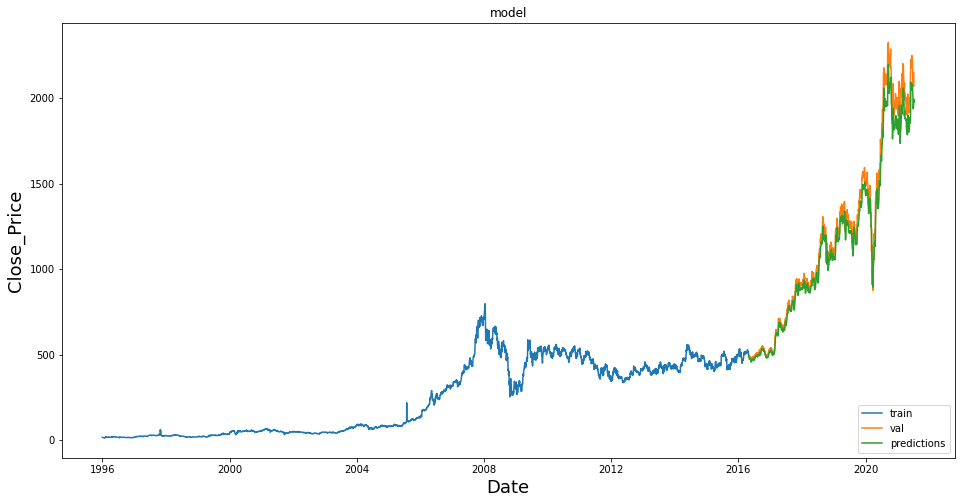

In [ ]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

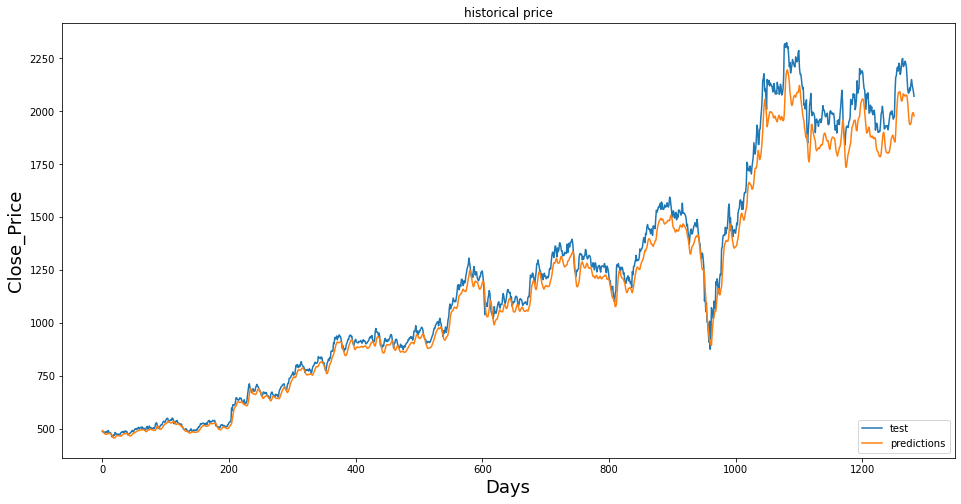

In [ ]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()